In [1]:
from pylab import *

$$
\frac{d\vec x}{dt} = g(\vec x , t)
$$

$$
\frac{d\vec x}{dt} = g(\vec x , t)
$$

$$
\vec x_{n+1} = \vec x _n + \delta \vec g(\vec x_n ,t_n) + \frac{1}{2} \delta^2 \mathbb{J}\cdot \vec g(\vec x_n ,t_n)
$$

$$
\vec x_{n+1} = \vec x _n + \delta \vec g(\vec x_n ,t_n) + \frac{1}{2} \delta ^2 \mathbb{J}\cdot \vec g(\vec x_n ,t_n)
$$

In [2]:
def ode_exp(f , t_intervalo , y0 , jac , delta=0.01):
    t = arange(t_intervalo[0],t_intervalo[1]+delta,delta)
    sol = zeros_like(t)
    sol[0] = y0
    for i in range(len(t)-1):
        sol[i+1] = sol[i] + delta*f(t[i],sol[i]) 
        + 0.5*(delta**2)*jac(t[i],sol[i])*f(t[i],sol[i])
    return (t,sol)

$$
\frac{dP}{dt} = aP\left(1-\frac{P}{P_c}\right)
$$

$$
\frac{dP}{dt} = aP\left(1-\frac{P}{P_c}\right)
$$

In [3]:
def mod_log(t , p , a=1 , pc=1):
    return a*p*(1-(p/pc))

def jac_mod_log(t , p , a=1 , pc=1):
    return a - 2*a*(p/pc)

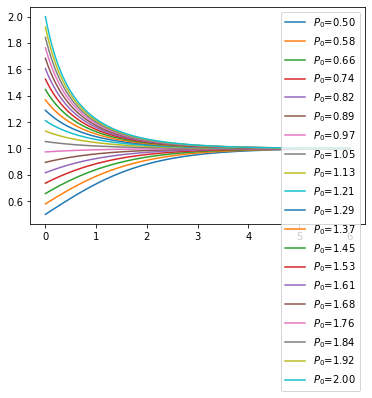

In [4]:
cond_ini = linspace(0.5,2,20)
for ini in cond_ini:
    sol = ode_exp(mod_log , (0,6) , ini , jac_mod_log )
    plot(sol[0],sol[1],label=r'$P_0$=%2.2f' %(ini))
legend()
show()

$$
\vec x_{n+1} = \vec x _n + \delta \vec g \left(\vec x_n + \frac{\delta}{2}\vec g(\vec x_n,t_n) , t_n + \frac{\delta}{2} \right) 
$$

$$
\vec x_{n+1} = \vec x _n + \delta \vec g \left(\vec x_n + \frac{\delta}{2} \vec g(\vec x_n,t_n) , t_n + \frac{\delta}{2} \right) 
$$

In [5]:
def RK2(f , t_intervalo , y0 , delta=0.01):
    t = arange(t_intervalo[0],t_intervalo[1]+delta,delta)
    sol = zeros_like(t)
    sol[0] = y0
    for i in range(len(t)-1):
        vec_n = sol[i] + 0.5*delta*f(t[i],sol[i])
        sol[i+1] = sol[i] + delta*f(t[i]+0.5*delta,vec_n)
    return (t,sol)

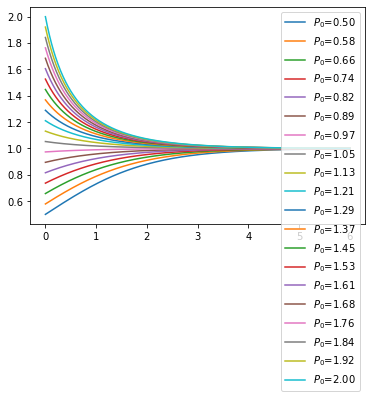

In [6]:
cond_ini = linspace(0.5,2,20)
for ini in cond_ini:
    sol = RK2(mod_log , (0,6) , ini )
    plot(sol[0],sol[1],label=r'$P_0$=%2.2f' %(ini))
legend()
show()

$$
\vec x_{n+1} = \vec x _n + \frac{\delta}{6} (k_1 +2k_2 + 2k_3 + k_4 ) 
$$
donde
$$
k_1 = \vec g \left(\vec x_n , t_n \right) \\
k_2 = \vec g \left(\vec x_n + \delta \frac{k_1}{2} , t_n + \frac{\delta}{2} \right)\\
k_3 = \vec g \left(\vec x_n + \delta \frac{k_2}{2} , t_n + \frac{\delta}{2} \right) \\
k_4 = \vec g \left(\vec x_n + \delta k_3 , t_n + \delta \right)
$$

$$
\vec x_{n+1} = \vec x _n + \frac{\delta}{6} (k_1 +2k_2 + 2k_3 + k_4 ) 
$$
donde
$$
k_1 = \vec g \left(\vec x_n , t_n \right) \\
k_2 = \vec g \left(\vec x_n + \delta \frac{k_1}{2} , t_n + \frac{\delta}{2} \right) \\
k_3 = \vec g \left(\vec x_n + \delta \frac{k_2}{2} , t_n + \frac{\delta}{2} \right) \\
k_4 = \vec g \left(\vec x_n + \delta k_3 , t_n + \delta \right)
$$

In [7]:
def RK4(f , t_intervalo , y0 , delta=0.01):
    t = arange(t_intervalo[0],t_intervalo[1]+delta,delta)
    sol = zeros_like(t)
    sol[0] = y0
    for i in range(len(t)-1):
        k1 = f( t[i] , sol[i] )
        k2 = f( t[i] + 0.5*delta , sol[i] + 0.5*delta*k1 )
        k3 = f( t[i] + 0.5*delta , sol[i] + 0.5*delta*k2 )
        k4 = f( t[i] + delta , sol[i] + delta*k3 )
        sol[i+1] = sol[i] + (delta/6)*(k1 + 2*k2 + 2*k3 + k4)
    return (t,sol)

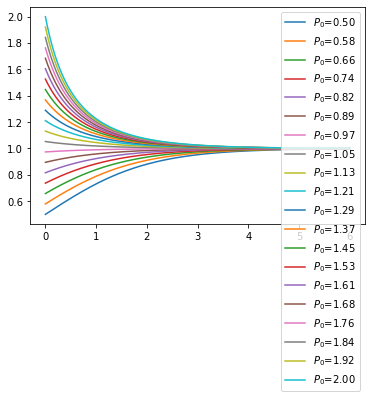

In [8]:
cond_ini = linspace(0.5,2,20)
for ini in cond_ini:
    sol = RK4(mod_log , (0,6) , ini )
    plot(sol[0],sol[1],label=r'$P_0$=%2.2f' %(ini))
legend()
show()